-------------------------------------------------------
**Defending and Harnessing the Bit-Flip based Adversarial Weight Attack**
-------------------------------------------------------

**CVPR2020 paper**

**Implemented with changes on google colab by zahra heydari**
-------------------------------------------------------

**IPM**

# **GPU Specifications**

In [1]:
!nvidia-smi

Tue Nov 15 05:18:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Number of cuda device**

In [2]:
import torch
torch.cuda.device_count()

1

# **Install Conda on Google Colab**

In [3]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.10.3-Linux-x86_64.sh
!bash ./Miniconda3-py37_4.10.3-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local python=3.7 ujson
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')
!conda update -n base -c defaults conda

--2022-11-15 05:19:03--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89026327 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.10.3-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>]  84.90M  45.8MB/s    in 1.9s    

2022-11-15 05:19:05 (45.8 MB/s) - ‘Miniconda3-py37_4.10.3-Linux-x86_64.sh’ saved [89026327/89026327]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2021.7.5=h06a4308_1
    - certifi==2021.5.30=py37h06a4308_0
    - cffi==1.14.6=py37h400218f_0
    - ch

# **CIFAR10 DATASET**

In [4]:
%matplotlib inline

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

**Dataset Definition**

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


**Visualizing CIFAR10 Data**

 frog  ship   car  frog


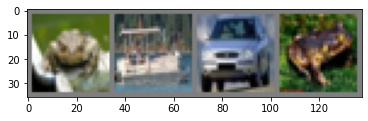

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# **Clone BFA from my github**

In [10]:
!git clone https://github.com/ZahraHeydari95/BFA.git

Cloning into 'BFA'...
remote: Enumerating objects: 760, done.
remote: Counting objects: 100% (331/331), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 760 (delta 220), reused 224 (delta 159), pack-reused 429
Receiving objects: 100% (760/760), 2.61 MiB | 29.74 MiB/s, done.
Resolving deltas: 100% (452/452), done.


**Delete the folder if you want**

In [ ]:
%cd ..
%rm -r BFA

**The contents of the current folder**

In [16]:
!ls


BFA  data  Miniconda3-py37_4.10.3-Linux-x86_64.sh  sample_data


**Go to BFA Folder**

In [17]:
%cd BFA

/content/BFA


# **Install requirements**

In [18]:
!conda install pytorch=1.1.0 torchvision=0.3.0 cudatoolkit=10.0 -c pytorch
!conda install python

Solving environment: \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.0
    - pytorch=1.1.0
    - torchvision=0.3.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    cudatoolkit-10.0.130       |                0       261.2 MB
    freetype-2.12.1            |       h4a9f257_0         626 KB
    giflib-5.2.1               |       h7b6447c_0          78 KB
    intel-openmp-2021.4.0      |    h06a4308_3561         4.2 MB
    j

In [19]:
!conda install tensorboardX

Solving environment: / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - tensorboardx


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libprotobuf-3.20.1         |       h4ff587b_0         2.1 MB
    protobuf-3.20.1            |   py37h295c915_0         290 KB
    tensorboardx-2.2           |     pyhd3eb1b0_0          86 KB
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  libprotobuf        pkgs/main/linux-64::libprotobuf-3.20.1-h4ff587b_0 None
  protobuf           pkgs/main/linux-64::protobuf-3.20.1-py37h295c915_0 None
  tensorboardx       pkgs/main/noarch::tensorboardx-2.2-pyhd3eb1b0_0 None


Proceed ([y]/n)? y


libprotobuf-3.20.1   | 2.1 MB    | : 100% 1.0/1 [00:00<00:00,  5

In [20]:
!pip --no-cache-dir install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 246.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.6/158.6 kB 263.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 147.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 248.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.6/765.6 kB 312.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 152.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 244.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 235.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 224.8 MB/s eta 0:00:00
     ━━━━━

In [21]:
!pip install -U setuptools

Error processing line 1 of /usr/local/lib/python3.7/site-packages/distutils-precedence.pth:

  Traceback (most recent call last):
    File "/usr/local/lib/python3.7/site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 40.6.3
    Uninstalling setuptools-40.6.3:
      Successfully uninstalled setuptools-40.6.3


# **HOST Name**

In [22]:
!hostname alpha

In [23]:
!hostname

alpha


In [24]:
!pwd

/content/BFA


# **Path**

In [25]:
!whereis tensorboard

tensorboard: /usr/local/bin/tensorboard


In [26]:
!python --version

Python 3.7.15


# **Attack on the model trained in floating-point**

**BFA**

In [27]:
!bash BFA_CIFAR_Attack_on_model_trained_in_floating_point.sh

Current host is: alpha
save path : ./save/2022-11-15/cifar10_resnet18_quan_BFA
{'arch': 'resnet18_quan', 'attack_sample_size': 64, 'clustering': False, 'data_path': '/content/data/cifar-10-batches-py', 'dataset': 'cifar10', 'decay': 0.0001, 'enable_bfa': True, 'epochs': 200, 'evaluate': False, 'fine_tune': False, 'gammas': [0.1, 0.1], 'gpu_id': 1, 'k_top': 10, 'lambda_coeff': 0.001, 'learning_rate': 0.001, 'manualSeed': 3884, 'model_only': False, 'momentum': 0.9, 'n_iter': 50, 'ngpu': 1, 'optimizer': 'SGD', 'print_freq': 50, 'quan_bitwidth': None, 'random_bfa': False, 'reset_weight': True, 'resume': '', 'save_path': './save/2022-11-15/cifar10_resnet18_quan_BFA', 'schedule': [80, 120], 'start_epoch': 0, 'test_batch_size': 256, 'use_cuda': False, 'workers': 8}
Random Seed: 3884
python version : 3.7.15 (default, Nov  7 2022, 22:00:21)  [GCC 11.2.0]
torch  version : 1.1.0
cudnn  version : 7501
171MB [00:03, 46.3MB/s]               
Files already downloaded and verified
=> creating model 'r

**Random BFA**

In [28]:
!bash BFA_CIFAR_Attack_on_model_trained_in_floating_point.sh

Current host is: alpha
mkdir: cannot create directory ‘save’: File exists
mkdir: cannot create directory ‘2022-11-15’: File exists
save path : ./save/2022-11-15/cifar10_resnet18_quan_BFA
{'arch': 'resnet18_quan', 'attack_sample_size': 64, 'clustering': False, 'data_path': '/content/data/cifar-10-batches-py', 'dataset': 'cifar10', 'decay': 0.0001, 'enable_bfa': True, 'epochs': 200, 'evaluate': False, 'fine_tune': False, 'gammas': [0.1, 0.1], 'gpu_id': 1, 'k_top': 10, 'lambda_coeff': 0.001, 'learning_rate': 0.001, 'manualSeed': 6741, 'model_only': False, 'momentum': 0.9, 'n_iter': 50, 'ngpu': 1, 'optimizer': 'SGD', 'print_freq': 50, 'quan_bitwidth': None, 'random_bfa': True, 'reset_weight': True, 'resume': '', 'save_path': './save/2022-11-15/cifar10_resnet18_quan_BFA', 'schedule': [80, 120], 'start_epoch': 0, 'test_batch_size': 256, 'use_cuda': False, 'workers': 8}
Random Seed: 6741
python version : 3.7.15 (default, Nov  7 2022, 22:00:21)  [GCC 11.2.0]
torch  version : 1.1.0
cudnn  versi

**Evaluation CIFAR resnet18 after Bit-Fltp**

In [29]:
!bash eval_CIFAR_resnet18.sh

Current host is: alpha
mkdir: cannot create directory ‘save’: File exists
mkdir: cannot create directory ‘2022-11-15’: File exists
save path : ./save/2022-11-15/cifar10_resnet18_eval/
{'arch': 'resnet18', 'attack_sample_size': 128, 'clustering': False, 'data_path': '/content/data/cifar-10-batches-py', 'dataset': 'cifar10', 'decay': 0.0001, 'enable_bfa': False, 'epochs': 200, 'evaluate': True, 'fine_tune': False, 'gammas': [0.1, 0.1], 'gpu_id': 1, 'k_top': None, 'lambda_coeff': 0.001, 'learning_rate': 0.001, 'manualSeed': 3186, 'model_only': False, 'momentum': 0.9, 'n_iter': 20, 'ngpu': 1, 'optimizer': 'SGD', 'print_freq': 100, 'quan_bitwidth': None, 'random_bfa': False, 'reset_weight': False, 'resume': '', 'save_path': './save/2022-11-15/cifar10_resnet18_eval/', 'schedule': [80, 120], 'start_epoch': 0, 'test_batch_size': 256, 'use_cuda': False, 'workers': 8}
Random Seed: 3186
python version : 3.7.15 (default, Nov  7 2022, 22:00:21)  [GCC 11.2.0]
torch  version : 1.1.0
cudnn  version : 

**Evaluation CIFAR  Quantized resnet18 after Bit-Fltp**

In [30]:
!bash eval_CIFAR_resnet18_quan.sh

Current host is: alpha
mkdir: cannot create directory ‘save’: File exists
mkdir: cannot create directory ‘2022-11-15’: File exists
save path : ./save/2022-11-15/cifar10_resnet18_quan_eval/
{'arch': 'resnet18_quan', 'attack_sample_size': 128, 'clustering': False, 'data_path': '/content/data/cifar-10-batches-py', 'dataset': 'cifar10', 'decay': 0.0001, 'enable_bfa': False, 'epochs': 200, 'evaluate': True, 'fine_tune': False, 'gammas': [0.1, 0.1], 'gpu_id': 1, 'k_top': None, 'lambda_coeff': 0.001, 'learning_rate': 0.001, 'manualSeed': 1410, 'model_only': False, 'momentum': 0.9, 'n_iter': 20, 'ngpu': 1, 'optimizer': 'SGD', 'print_freq': 100, 'quan_bitwidth': None, 'random_bfa': False, 'reset_weight': True, 'resume': '', 'save_path': './save/2022-11-15/cifar10_resnet18_quan_eval/', 'schedule': [80, 120], 'start_epoch': 0, 'test_batch_size': 256, 'use_cuda': False, 'workers': 8}
Random Seed: 1410
python version : 3.7.15 (default, Nov  7 2022, 22:00:21)  [GCC 11.2.0]
torch  version : 1.1.0
cud

# **Training-based BFA defense**

# **1. Binarization-aware training**

**Copy file quantization-binariztaion.py from models folder in quantization.py**

for 10 epoches

In [31]:
!bash train_CIFAR.sh

Current host is: alpha
mkdir: cannot create directory ‘save’: File exists
mkdir: cannot create directory ‘2022-11-15’: File exists
save path : ./save/2022-11-15/cifar10_resnet18_quan_10_SGD_binarized
{'arch': 'resnet18_quan', 'attack_sample_size': 128, 'clustering': False, 'data_path': '/content/data/cifar-10-batches-py', 'dataset': 'cifar10', 'decay': 0.0003, 'enable_bfa': False, 'epochs': 10, 'evaluate': False, 'fine_tune': False, 'gammas': [0.1, 0.1], 'gpu_id': 1, 'k_top': None, 'lambda_coeff': 0.001, 'learning_rate': 0.1, 'manualSeed': 995, 'model_only': False, 'momentum': 0.9, 'n_iter': 20, 'ngpu': 1, 'optimizer': 'SGD', 'print_freq': 100, 'quan_bitwidth': None, 'random_bfa': False, 'reset_weight': False, 'resume': '', 'save_path': './save/2022-11-15/cifar10_resnet18_quan_10_SGD_binarized', 'schedule': [80, 120], 'start_epoch': 0, 'test_batch_size': 128, 'use_cuda': False, 'workers': 4}
Random Seed: 995
python version : 3.7.15 (default, Nov  7 2022, 22:00:21)  [GCC 11.2.0]
torch  

In [32]:
!bash BFA_CIFAR.sh

Current host is: alpha
mkdir: cannot create directory ‘save’: File exists
mkdir: cannot create directory ‘2022-11-15’: File exists
save path : ./save/2022-11-15/cifar10_resnet18_quan_BFA_defense_test_binarized
{'arch': 'resnet18_quan', 'attack_sample_size': 128, 'clustering': False, 'data_path': '/content/data/cifar-10-batches-py', 'dataset': 'cifar10', 'decay': 0.0001, 'enable_bfa': True, 'epochs': 200, 'evaluate': True, 'fine_tune': True, 'gammas': [0.1, 0.1], 'gpu_id': 1, 'k_top': None, 'lambda_coeff': 0.001, 'learning_rate': 0.001, 'manualSeed': 7442, 'model_only': False, 'momentum': 0.9, 'n_iter': 50, 'ngpu': 1, 'optimizer': 'SGD', 'print_freq': 50, 'quan_bitwidth': None, 'random_bfa': False, 'reset_weight': True, 'resume': '/content/BFA/save/2022-11-15/cifar10_resnet18_quan_10_SGD_binarized/checkpoint.pth.tar', 'save_path': './save/2022-11-15/cifar10_resnet18_quan_BFA_defense_test_binarized', 'schedule': [80, 120], 'start_epoch': 0, 'test_batch_size': 128, 'use_cuda': False, 'wor

# **2. Piecewise Weight Clustering (PC)**

**return to first quantization.py file from models folder**

for 2 epoches

In [34]:
!bash train_CIFAR.sh

Current host is: alpha
mkdir: cannot create directory ‘save’: File exists
mkdir: cannot create directory ‘2022-11-15’: File exists
save path : ./save/2022-11-15/cifar10_resnet18_quan_2_SGD_binarized
{'arch': 'resnet18_quan', 'attack_sample_size': 128, 'clustering': False, 'data_path': '/content/data/cifar-10-batches-py', 'dataset': 'cifar10', 'decay': 0.0003, 'enable_bfa': False, 'epochs': 2, 'evaluate': False, 'fine_tune': False, 'gammas': [0.1, 0.1], 'gpu_id': 1, 'k_top': None, 'lambda_coeff': 0.001, 'learning_rate': 0.1, 'manualSeed': 1306, 'model_only': False, 'momentum': 0.9, 'n_iter': 20, 'ngpu': 1, 'optimizer': 'SGD', 'print_freq': 100, 'quan_bitwidth': None, 'random_bfa': False, 'reset_weight': False, 'resume': '', 'save_path': './save/2022-11-15/cifar10_resnet18_quan_2_SGD_binarized', 'schedule': [80, 120], 'start_epoch': 0, 'test_batch_size': 128, 'use_cuda': False, 'workers': 4}
Random Seed: 1306
python version : 3.7.15 (default, Nov  7 2022, 22:00:21)  [GCC 11.2.0]
torch  v

In [35]:
!bash BFA_CIFAR.sh

Current host is: alpha
mkdir: cannot create directory ‘save’: File exists
mkdir: cannot create directory ‘2022-11-15’: File exists
save path : ./save/2022-11-15/cifar10_resnet18_quan_BFA_defense_test_binarized
{'arch': 'resnet18_quan', 'attack_sample_size': 128, 'clustering': False, 'data_path': '/content/data/cifar-10-batches-py', 'dataset': 'cifar10', 'decay': 0.0001, 'enable_bfa': True, 'epochs': 200, 'evaluate': True, 'fine_tune': True, 'gammas': [0.1, 0.1], 'gpu_id': 1, 'k_top': None, 'lambda_coeff': 0.001, 'learning_rate': 0.001, 'manualSeed': 9348, 'model_only': False, 'momentum': 0.9, 'n_iter': 10, 'ngpu': 1, 'optimizer': 'SGD', 'print_freq': 50, 'quan_bitwidth': None, 'random_bfa': False, 'reset_weight': True, 'resume': '/content/BFA/save/2022-11-15/cifar10_resnet18_quan_2_SGD_binarized/checkpoint.pth.tar', 'save_path': './save/2022-11-15/cifar10_resnet18_quan_BFA_defense_test_binarized', 'schedule': [80, 120], 'start_epoch': 0, 'test_batch_size': 128, 'use_cuda': False, 'work

In [36]:
!bash eval_CIFAR.sh

Current host is: alpha
mkdir: cannot create directory ‘save’: File exists
mkdir: cannot create directory ‘2022-11-15’: File exists
save path : ./save/2022-11-15/cifar10_resnet18_quan_new_exp
{'arch': 'resnet18_quan', 'attack_sample_size': 128, 'clustering': False, 'data_path': '/content/data/cifar-10-batches-py', 'dataset': 'cifar10', 'decay': 0.0003, 'enable_bfa': False, 'epochs': 2, 'evaluate': True, 'fine_tune': True, 'gammas': [0.1, 0.1], 'gpu_id': 1, 'k_top': None, 'lambda_coeff': 0.001, 'learning_rate': 0.1, 'manualSeed': 5191, 'model_only': False, 'momentum': 0.9, 'n_iter': 20, 'ngpu': 1, 'optimizer': 'SGD', 'print_freq': 100, 'quan_bitwidth': None, 'random_bfa': False, 'reset_weight': False, 'resume': '/content/BFA/save/2022-11-15/cifar10_resnet18_quan_2_SGD_binarized/checkpoint.pth.tar', 'save_path': './save/2022-11-15/cifar10_resnet18_quan_new_exp', 'schedule': [80, 120], 'start_epoch': 0, 'test_batch_size': 100, 'use_cuda': False, 'workers': 4}
Random Seed: 5191
python versi

# Results

# **BFA vs Random**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

import os
import numpy as np
import seaborn as sns

plt.subplots_adjust(hspace=0.5)
plt.rcParams.update({'font.size': 13})

<Figure size 432x288 with 0 Axes>

In [38]:
csv_path1 = '/content/BFA/save/2022-11-15/cifar10_resnet18_quan_BFA/attack_profile_3884.csv'
csv_path2 = '/content/BFA/save/2022-11-15/cifar10_resnet18_quan_BFA/attack_profile_6741.csv'

df1 = pd.read_csv(csv_path1, index_col=False)
df2 = pd.read_csv(csv_path2, index_col=False)

**BFA**

In [40]:
print(df1)

   module idx  bit-flip idx            module name         weight idx  \
0          26             1  layer2.0.downsample.0  [114  50   0   0]   

   weight before attack  weight after attack  validation accuracy  \
0                  -0.0               -128.0                 0.01   

   accuracy drop  trial seed  
0           0.01        3884  


**Random BFA**

In [39]:
print(df2)

   module idx  bit-flip idx module name  weight idx weight before attack  \
0  module_idx             1        loss      235465          tensor(-3.)   

  weight after attack  validation accuracy  accuracy drop  trial seed  
0         tensor(-3.)                 0.02            0.0        6741  


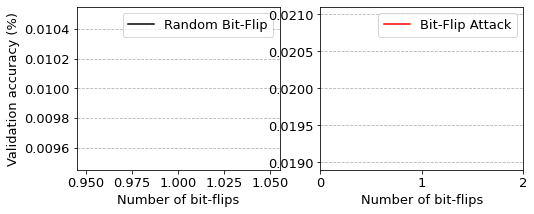

In [42]:
# fig, ax = plt.subplots(figsize=(6,2))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

sns.lineplot(x='bit-flip idx', y='validation accuracy', data=df1, label='Random Bit-Flip',color="black", ax=ax[0])

plt.grid(True, 'major', 'y', ls='--', lw=0.8, c='k', alpha=.3)
plt.ylabel('')
plt.xlabel('number of bit-flips')

sns.lineplot(x='bit-flip idx', y='validation accuracy', data=df2, label='Bit-Flip Attack', color="red", ax=ax[1])

for ax_i in ax.flat:
    ax_i.grid(True, 'major', 'y', ls='--', lw=0.8, c='k', alpha=.3)


ax[0].set(xlabel='Number of bit-flips', ylabel='Validation accuracy (%)')
ax[1].set(xlabel='Number of bit-flips', ylabel='')
ax[1].set_xticks([0,1,2])

# plt.grid(True, 'major', 'y', ls='--', lw=0.8, c='k', alpha=.3)
# plt.ylabel('')
# plt.xlabel('number of bit-flips')

# plt.show()

# **observation**

In [47]:
csv_dir = '/content/BFA/save/2022-11-15/cifar10_resnet18_quan_BFA'

csv_file_list = [file for file in os.listdir(
    csv_dir) if file.endswith('.csv')
]

# print(csv_file_list)

csv_dict = {}

# df = pd.DataFrame()
for file in csv_file_list:
    csv_dict[file] = pd.read_csv(os.path.join(csv_dir, file), index_col=False)

df = pd.concat([csv_dict[file] for file in csv_dict], ignore_index=True)

In [51]:
df

,module idx,bit-flip idx,module name,weight idx,weight before attack,weight after attack,validation accuracy,accuracy drop,trial seed,top-1 output,BFA iteration
0,26,1.0,layer2.0.downsample.0,[114 50 0 0],-0.0,-128.0,0.01,0.01,3884.0,NaN,NaN
1,module_idx,1.0,loss,235465,tensor(-3.),tensor(-3.),0.02,0.00,6741.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[156 628 500 536 865 349 276 642 30 954 241 5...,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[ 70 148 963 554 510 802 35 912 26 106 975 ...,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[372 510 912 973 509 555 580 537 698 6 118 9...,0.0
...,...,...,...,...,...,...,...,...,...,...,...
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[118 937 895 170 865 779 454 35 116 146 878 9...,1.0
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[847 289 762 537 466 983 865 403 311 536 468 9...,1.0
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[973 865 89 116 104 519 118 404 825 510 625 5...,1.0
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[537 751 621 566 802 509 104 339 275 540 379 5...,1.0


**Analyze the attack**

In [49]:
bfs = []
for idx in set(df['trial seed'].values.flatten()):
    bfs.append(df.loc[df['trial seed']==idx]['bit-flip idx'].max())
bfs = np.array(bfs)
print(
    'bit-flips for multiple trials {} \n \
mean: {} \n std: {}'.format(bfs, bfs.mean(), bfs.std())
)

bit-flips for multiple trials [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan] 
 mean: nan 
 std: nan


In [50]:
from torchsummary import summary
from models import resnet18_quan
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
m = resnet18_quan().to(device)
summary(m, input_size=(3, 32, 32))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       quan_Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
       quan_Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
       quan_Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
      quan_Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

**Plot for Observation-1**

In [52]:
# plot style
sns.set(style="whitegrid")
sns.set(style="ticks")
# sns.despine()
sns.set_style({"font.sans-serif":"DejaVu Sans"})
sns.set_style({"grid.color":'0.9'})
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1})

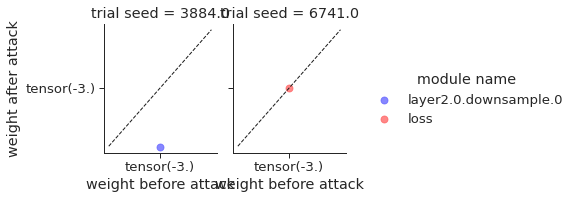

In [53]:
# f, ax = plt.subplots(figsize=(8,8))

g = sns.FacetGrid(df, col="trial seed", hue='module name',
                palette = 'seismic', margin_titles=True)
g.map(plt.scatter, "weight before attack", "weight after attack", alpha=.7, s=50)
g.add_legend()

for ax in g.axes.flat:
    ax.plot((-127, 127), (-127, 127), c=".1", ls="--")

**solution for color bar:**

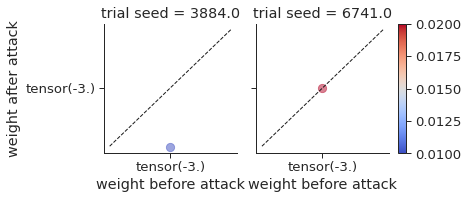

In [54]:
g = sns.FacetGrid(df, col="trial seed", palette = 'seismic')

def facet_scatter(x, y, c, **kwargs):
    """Draw scatterplot with point colors from a faceted DataFrame columns."""
    kwargs.pop("color")
    plt.scatter(x, y, c=c, **kwargs)

# print(df['accuracy drop'].max())
# vmin, vmax = 0, 30
# vmin, vmax = df['accuracy drop'].min(), df['accuracy drop'].max()
vmin, vmax = df['validation accuracy'].min(), df['validation accuracy'].max()

# cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)
# cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True, center="light")
# cmap = sns.light_palette("red", as_cmap=True)
# cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
cmap = 'coolwarm'

g = g.map(facet_scatter,  "weight before attack", "weight after attack", 'validation accuracy',
          s=70, alpha=0.5, vmin=vmin, vmax=vmax, cmap=cmap)

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

# Draw the colorbar
g.fig.colorbar(points, cax=cax)

for ax in g.axes.flat:
    ax.plot((-127, 127), (-127, 127), c=".1", ls="--")

In [101]:
csv_dir = '/content/BFA/save/2022-11-15/cifar10_resnet18_quan_BFA_defense_test_binarized'

csv_file_list = [file for file in os.listdir(
    csv_dir) if file.endswith('.csv')
]

# print(csv_file_list)

csv_dict = {}

for file in csv_file_list:
    if 'output_summary' in file:
        csv_dict[file] = pd.read_csv(os.path.join(csv_dir, file), index_col=False)

df = pd.concat([csv_dict[file] for file in csv_dict], ignore_index=True)

In [102]:
df

,top-1 output,BFA iteration
0,[6 7 0 4 0 4 8 9 6 1 5 6 2 7 4 6 8 1 8 8 1 4 0...,49
1,[1 8 7 2 7 7 9 7 7 0 6 4 7 9 5 2 1 7 6 2 3 7 1...,49
2,[7 7 6 1 2 8 0 7 4 9 3 4 6 6 5 0 7 0 2 7 1 4 7...,49
3,[7 3 2 4 7 6 4 5 5 7 6 6 4 6 4 4 1 3 0 7 4 7 4...,49
4,[7 3 0 0 4 5 4 5 6 4 5 7 8 4 8 7 8 9 7 5 4 5 6...,49
...,...,...
4024,[6 4 6 0 2 2 0 0 6 9 2 7 9 4 2 2 0 7 7 2 2 0 4...,20
4025,[0 9 2 2 2 0 7 8 4 2 0 2 4 1 0 2 3 0 2 2 3 0 2...,20
4026,[0 6 2 6 3 2 6 2 9 2 6 1 2 0 2 2 1 2 6 9 0 4 0...,20
4027,[3 8 2 3 3 0 4 2 6 2 6 9 0 1 4 1 0 2 7 6 0 4 2...,20


In [103]:
# plot style
sns.set(style="whitegrid")
sns.set(style="ticks")
# sns.despine()
sns.set_style({"font.sans-serif":"DejaVu Sans"})
sns.set_style({"grid.color":'0.9'})
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1})

In [ ]:
f, ax = plt.subplots(figsize=(4,4))
sns.distplot(df['top-1 output'], kde=False, vertical=True)
label_list = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# plt.xticks(np.arange(0, 10))
plt.yticks(np.arange(0, 10), label_list)

**Evolution of output under BFA**

In [76]:
csv_dir = '/content/BFA/save/2022-11-15/cifar10_resnet18_quan_BFA'

csv_file_list = [file for file in os.listdir(
    csv_dir) if file.endswith('.csv')
]

# print(csv_file_list)

csv_dict = {}

for file in csv_file_list:
    if 'output_summary' in file:
        tmp_df = pd.read_csv(os.path.join(csv_dir, file), index_col=False)
        csv_dict[file] = tmp_df

df = pd.concat([csv_dict[file] for file in csv_dict], ignore_index=True)


In [77]:
# change the header of certain column
# https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas 
try:
    df.rename(columns={'BFA iteration':'iter'}, inplace=True)
    df.rename(columns={'top-1 output':''}, inplace=True)
except:
    pass

# drop several iterations for less subfigures
# https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
for i in [1,2,4,5,7,8,10,11]:
    # print(df[df['iter'] != i])
    df = df[df['iter'] != i]
    # df.drop(df['iter'] == i)

# df = pd.concat([df['iter']==iter for iter in [0,3,6,9,12]], ignore_index=True)

In [78]:
df

,,iter
0,[156 628 500 536 865 349 276 642 30 954 241 5...,0
1,[ 70 148 963 554 510 802 35 912 26 106 975 ...,0
2,[372 510 912 973 509 555 580 537 698 6 118 9...,0
3,[156 218 293 212 671 825 625 119 403 403 509 8...,0
4,[ 79 555 776 309 403 580 786 625 509 825 628 ...,0
5,[975 776 536 406 973 716 944 603 49 628 30 5...,0
6,[586 509 509 186 537 540 975 804 670 118 54 4...,0
7,[ 56 456 573 979 865 776 509 403 554 89 119 8...,0
8,[810 139 758 943 104 251 825 30 664 509 562 9...,0
9,[293 510 537 311 628 978 509 168 454 146 580 8...,0


In [ ]:
g.fig.savefig(os.path.join(csv_dir,'BFA_output_evolution.pdf'), bbox_inches="tight", transparent=True)


**Single sample attack**

In [100]:
csv_dir = '/content/BFA/save/2022-11-15/cifar10_resnet18_quan_BFA_defense_test_binarized'

csv_file_list = [file for file in os.listdir(
    csv_dir) if file.endswith('.csv')
]

# print(csv_file_list)

csv_dict = {}

for file in csv_file_list:
    if 'output_summary' in file:
        tmp_df = pd.read_csv(os.path.join(csv_dir, file), index_col=False)
        csv_dict[file] = tmp_df

df = pd.concat([csv_dict[file] for file in csv_dict], ignore_index=True)
try:
    df.rename(columns={'BFA iteration':'iter'}, inplace=True)
    df.rename(columns={'top-1 output':''}, inplace=True)
except:
    pass


# **Attack Profile**

In [87]:
csv_path1 = '/content/BFA/save/2022-11-15/cifar10_resnet18_quan_BFA_defense_test_binarized/attack_profile_7442.csv'
csv_path2 = '/content/BFA/save/2022-11-15/cifar10_resnet18_quan_BFA_defense_test_binarized/attack_profile_9348.csv'

df1 = pd.read_csv(csv_path1, index_col=False)
df2 = pd.read_csv(csv_path2, index_col=False)

In [88]:
print(df1)

     module idx  bit-flip idx module name     weight idx  \
0             1             1       conv1  [55  1  1  1]   
1             1             2       conv1  [55  1  3  0]   
2             1             3       conv1  [55  1  6  6]   
3             1             4       conv1  [55  2  3  0]   
4             1             5       conv1  [59  1  2  0]   
..          ...           ...         ...            ...   
471           1           472       conv1  [59  1  4  2]   
472           1           473       conv1  [59  1  4  3]   
473           1           474       conv1  [59  1  4  4]   
474           1           475       conv1  [59  1  5  3]   
475           1           476       conv1  [59  1  5  4]   

     weight before attack  weight after attack  validation accuracy  \
0                    -1.0                  1.0                 61.6   
1                    -1.0                  1.0                 61.6   
2                    -1.0                  1.0                 61.

Text(0.5, 0, 'number of bit-flips')

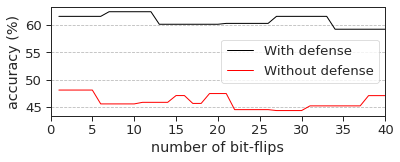

In [90]:
fig, ax = plt.subplots(figsize=(6,2))
sns.lineplot(x='bit-flip idx', y='validation accuracy', data=df1, label='With defense',color="black")
sns.lineplot(x='bit-flip idx', y='validation accuracy', data=df2, label='Without defense', color="red")
plt.xlim(0,40)
plt.grid(True, 'major', 'y', ls='--', lw=0.8, c='k', alpha=.3)
plt.ylabel('accuracy (%)')
plt.xlabel('number of bit-flips')

In [91]:
import torch
def int2bin(input, num_bits):
    '''
    convert the signed integer value into unsigned integer (2's complement equivalently).
    '''
    output = input.clone()
    output[input.lt(0)] = 2**num_bits + output[input.lt(0)]
    return output

input = torch.Tensor([-1])
int2bin(input,1)

tensor([1.])